#### Übung zu Kontrollstrukturen - Multiple Choice Quiz

Im folgenden wollen wir ein kleines Quizprogramm erstellen, dem man eine Liste mit
Multiple-Choice Fragen und Antworten übergeben kann. Das Programm soll dann nacheinander
die Fragen mit den Antwortoptionen präsentieren, eine Antwort einlesen und diese mit der richtigen Antwort vergleichen.

Die Fragen sind in der Datei "questions.txt", die sie [hier](https://github.com/kaiu85/stable-diffusion-workshop/raw/main/Jupyter_Intro/questions.txt) herunterladen können. Diese Datei 
enthält zwei Fragen und sieht so aus:

```python
Welches ist der coolste Wahlfachtrack?
Verteidigung gegen die dunklen Künste
Digitale Medizin
Geschichte der Zauberei
Pflege magischer Geschöpfe
1
Die richtige Antwort bei der Integrierten ist:
Heidelberg
Leber
C
Pflege magischer Geschöpfe
0
```

Eine Zeile enthält immer die Frage. Dann folgen vier Zeilen, die jeweils eine Antwortoption erhalten. Dann folgt
eine Zahl, welche die richtige Antwort angibt. Beachten sie, dass wir hier die Python-Konvention verwenden, dass 
das __erste Element__ einer Liste immer die Nummer __0__ erhält.

Danach schließt direkt die Zeile mit dem Fragetext der nächsten Frage an, und so weiter.

Um die Datei in das Arbeitsverzeichnis ihrer Colab-Instanz hochzuladen, können sie links den Datei-Explorer öffnen, in dem sie auf das Ordnersymbol klicken.

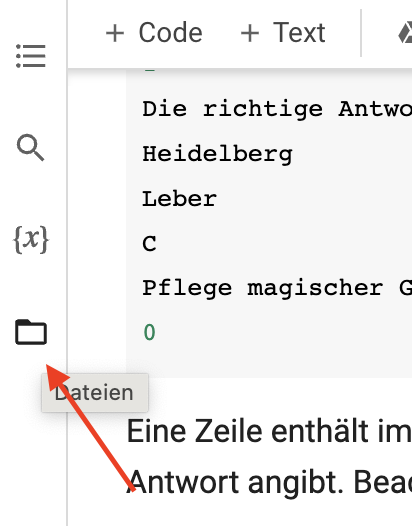

Nun öffnet sich eine Ansicht des Ordners, in dem ihr Colab-Notebook ausgeführt wird.

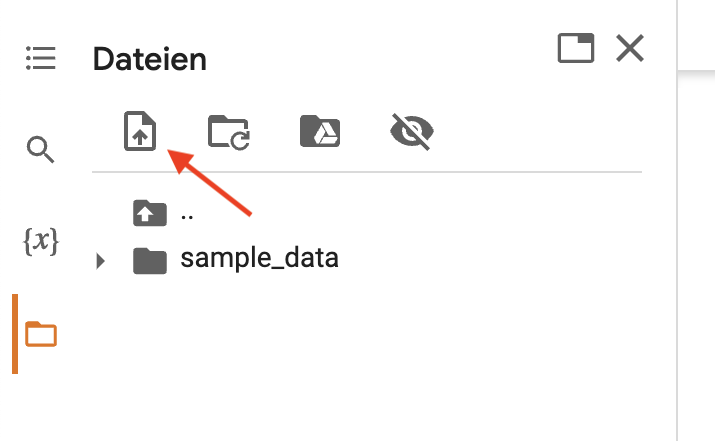

Mit dem markierten Symbol können sie nun die Datei "questions.txt" auf ihre Colab-Instanz hochladen, so dass wir die Textdatei in der nächsten Codezelle einlesen können.

Wir haben eine Hilfsfunktion "lade_fragen_liste" gebastelt, die solch eine Fragendatei einließt und eine Liste mit
[Dictionaries](https://www.python-kurs.eu/python3_dictionaries.php) ausgibt, die jeweils eine Frage darstellen.

In dem sie die nächste (versteckte) Codezelle ausführen, wird diese Funktion geladen. Falls es sie interessiert, klappen sie gerne die Codezelle aus, schauen sie sich den Code an und stellen sie Fragen.

In [ ]:
#@title Definiere "lade_fragen_liste"

def lade_fragen_liste(filename):

    fragen = [];
    
    with open(filename) as f:
        content = f.readlines()
        #remove whitespace characters like `\n` at the end of each line
        content = [x.strip() for x in content] 
        
    print('%d Zeilen eingelesen, entspricht %d Fragen.' % (len(content),len(content)/6))
        
    for i in range(int(len(content)/6)):
        
        frage = {
            "frage": content[i*6],
            "antworten": content[i*6+1:i*6+5],
            "korrekt": int(content[i*6+5]) 
        }
        
        fragen.append(frage)
        
    return fragen

In [ ]:
### Nun können wir die Hilfsfunktion "lade_fragen_liste"
### benutzen, um die Fragen aus der Textdatei zu laden.

### Und wir laden die Fragen aus der Datei "fragen.txt" im selben Ordner.
fragen = lade_fragen_liste('questions.txt')

Wie sie sehen, gibt die Funktion "lade_fragen_liste" auch gleich aus, wie viele Fragen eingelesen wurden.
Betrachten wir die Variable "fragen" zunächst etwas genauer.

In [ ]:
print(fragen)

Fragen ist also eine Liste aus zwei Elementen, wobei jedes Element ein Dictionary enthält, das eine komplette "Frage" (d.h. Fragentext, Antwortoptionen und korrekte Antwort) repräsentiert. Schauen wir 
uns das __erste Element__ der Liste an (beachte den __Index 0__).

In [ ]:
print(fragen[0])

Sie sehen, dass dieses Dictionary einen Eintrag "frage" enthält. Dieser beinhaltet den Fragentext als String.
Außerdem enthält das Dictionary einen Eintrag "antworten". Dieser Eintrag besteht aus einer Liste aus Strings, 
wobei jeder eintrag dieser Liste eine Antwortoption enthält.
Der letzte Eintrag "korrekt" enthält den Index der korrekten Antwortoption. Schauen wir uns das noch etwas 
genauer an.

In [ ]:
erste_frage = fragen[0]

print(erste_frage['frage'])

In [ ]:
print(erste_frage['antworten'])

In [ ]:
print(erste_frage['korrekt'])

In [ ]:
antworten_erste_frage = erste_frage['antworten']
korrekte_antwort_erste_frage = erste_frage['korrekt']

print('Die richtige Antwort auf die Frage:')
print('\n')
print(erste_frage['frage'])
print('\n')
print('ist')
print('\n')
print(antworten_erste_frage[korrekte_antwort_erste_frage])

Sie können sich gerne die Datei fragen.txt über das Colab-Interface anschauen, indem sie im Datei-Explorer links auf den Dateinamen Doppelklicken. 

Man kann Textdateien damit genauso wie Notebooks öffnen und editieren. Falls sie möchten, fügen sie gerne noch 
ein paar Fragen (inklusive Antworten und Index der richtigen Antwortoption) hinzu.
Wichtig ist dabei, die Formatkonvention 

__1 Zeile Fragentext, 4 Zeilen Antwortoptionen, 1 Zeile korrekte Antwortoption__ 

einzuhalten.

## Erste Aufgabe

Die __erste Aufgabe__ ist es nun, die Kontrollstruktur __"for"__ anzuwenden, um
einmal durch die Liste der Fragen zu gehen und für jede Frage den Text der Frage und die Antwortoptionen
mit Hilfe der __print()__ Funktion ausgebt. __print('\n')__ gibt eine leere Zeile aus.

In [ ]:
### Hier beginnt ihr Code



<details><summary>Klicken sie hier für eine mögliche Lösung</summary>
<p>
    
```python
for f in fragen:
    print('Frage:')
    print(f["frage"])
    print("\n")
    
    for i in range(len(f["antworten"])):
        print('Antwortoption %d: ' % i)
        print(f["antworten"][i])
        
    print("\n")
```

</p>
</details>

Das sieht schonmal sehr gut aus, ist aber noch nicht wirklich interaktiv.

Damit es interaktiver wird, kann man mit dem Befehl __input()__ eine kleine Textbox erstellen, um einen
Eingabetext einzulesen.

Als Argument erhält die Funktion __input()__ einen kurzen Text, der vor der Eingabebox angezeigt wird.

Probiert wir es einmal aus:

In [ ]:
x = input('Geben sie hier einen Input ein und bestätigen sie mit Enter:')

print('\n')
print('Sie haben folgende Eingabe gemacht:')
print('\n')
print(x)

Wunderbar, nun können wir auch Eingaben einlesen.

Die Eingaben werden zunächst immer als String formatiert, auch wenn man nur eine Zahl eingibt. 

Schauen wir uns das mal an:


In [ ]:
x = input('Geben sie die Zahl 11 ein und bestätigen sie mit Enter:')

print('\n')
print('Sie haben folgende Eingabe gemacht:')
print('\n')
print(x)

Wenn wir die Eingabe jetzt aber mit dem __==__ - Operator mit der Zahl 11 vergleichen erhalten wir:

In [ ]:
if 11 == x:
    print("Gleich")
else:
    print("Nicht gleich")

Das ist zunächst verwirrend. 

Was passiert ist, dass die Zeichenkette '11', die in x gespeichert ist, mit
der Zahl 11 verglichen wird.

Wenn wir den Input aus der Textbox ebenfalls als ganze Zahl ("integer") interpretieren wollen, müssen wir das Python
explizit mitteilen. Dazu benutzt man die Funktion __int(x)__

Schauen wir, was passiert, wenn wir x zunächst in eine Zahl umwandeln und dann mit der Zahl 11 vergleichen.

In [ ]:
if 11 == int(x):
    print("Gleich")
else:
    print("Nicht gleich")

Wunderbar, jetzt können wir die eingelesene Zahl direkt mit Zahlen vergleichen.


## Zweite Aufgabe
Damit sollten sie jetzt gerüstet sein, um die __zweite Aufgabe__ anzugehen:
Erweitern sie ihren Code von oben mit Hilfe der Kontrollstruktur __"if"__ so, dass direkt nachdem eine Frage und die dazugehören Antwortoptionen
präsentiert worden sind, eine entsprechende Antwort eingelesen wird. Vergleichen sie die gegebene
Antwort mit der korrekten Antwort. Falls die Antwort korrekt war, teilen sie dies dem Nutzer mit,
falls die Antwort falsch war, teilen sie dies ebenfalls mit und geben sie die korrekte Antwortoption aus. 

__Zusatz__: Berechnen Sie die Anzahl und den relativen Anteil der richtig beantworteten Fragen und teilen Sie diese dem Nutzer mit. 

In [ ]:
### Hier beginnt ihr Code
    

<details><summary>Klicken sie hier für eine mögliche Lösung</summary>
<p>

```python
### Hier beginnt ihr Code
richtig_beantwortet = 0
for f in fragen:
    print('Frage:')
    print(f["frage"])
    print("\n")

    for i in range(len(f["antworten"])):
        print('Antwort %d: ' % i)
        print(f["antworten"][i])

    print("\n")

    antwort = int(input("Ihre Antwort:"))

    if antwort == f["korrekt"]:
        print('Richtig! Sehr gut! :)')
        richtig_beantwortet += 1
    else:
        print('Leider nicht korrekt. Die richtige Antwort war:')
        print(f["antworten"][f["korrekt"]])

    print("\n")
    
prozent_korrekt = richtig_beantwortet/len(fragen)
print('Anzahl der richtig beantwortete Fragen: {} von {}'.format(richtig_beantwortet,len(fragen)))
print('Relativer Anteil der richtig beantwortete Fragen: {}'.format(prozent_korrekt))
```

</p>
</details>

# Zusatzaufgaben

Falls sie noch Zeit und Lust haben, können sie sich überlegen, wie man folgende Erweiterungen realisieren könnte:
1. Bildfragen implementieren, so dass in einer Extrazeile unter jeder Frage in "fragen.txt" der Dateiname einer Bilddatei steht, die dann über/unter der Frage angezeigt wird?
2. Verschieden viele Antwortmöglichkeiten erlauben?
3. Verschieden viele richtige Antwortmöglichkeiten erlauben? (i.e. "Welche der folgenden Aussagen ist richtig?:...")
4. Hinweise einbinden, die angezeit werden, wenn man eine Frage falsch beantwortet hat, so dass man nach dem Hinweis nochmal die Möglichkeit hat, seine Antwort zu ändern. 
5. Eventuell sogar abgestufte Hinweise implementieren, die so lange angezeigt werden, bis es zu einer Frage keine weiteren Hinweise mehr gibt, oder man die Frage richtig beantwortet hat.